##Business Use Case

You are a data scientist working for a digital health and wellness company.<br>
The company has labelled its customer based on intensity of work tehy coukd perform - A, B, C, D<br>

**Task : Given a new customer, help the company in recommending customised workout plans by predicting customer's class**

##Data Acquisition

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [134]:
#Import data and save it into input.csv file
!wget "https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU" -O input.csv

--2023-07-21 19:01:56--  https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
Resolving drive.google.com (drive.google.com)... 74.125.126.138, 74.125.126.101, 74.125.126.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gv7rjfk45qek7lro7k50iojf0cvoi5qc/1689966075000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=cfadb45c-a4d9-4e3c-89af-2014d83d73ec [following]
--2023-07-21 19:01:56--  https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gv7rjfk45qek7lro7k50iojf0cvoi5qc/1689966075000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=cfadb45c-a4d9-4e3c-89af-2014d83d73ec
Resolving doc-0s-50-docs.googleusercontent.com (doc-0s-50-docs.googleusercontent.com)... 142.250.1.132, 2607:f

**Data Description**

| Id | Features | Description |
| :-- | :-- | :-- |
| 01 | **Age** | Age of the customer |
|02| **gender** | gender of the customer (M/F)|
|03|**height_cm**|height of the customer in cm|
|04|**weight_kg**|weight of the customer in kg|
|05|**body_fat_%**| % of fat in customer's body|
|06|**diastolic**|diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats|
|07|**systolic**|systolic blood pressure, measures the pressure in your arteries when your heart beats|
|08|**gripForce**|strength of customer's grip|
|09|**sit and bend forward_cm**|to measure flexibility of customer|
|10|**sit-ups counts**|count of sit-ups customer can perform|
|11|**broad jump_cm**|It is the max jump customer can perform in cm|
|12|**class**|Category of customer based on the intensity of workout|

In [135]:
#Read and store into datafarme
df = pd.read_csv("input.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


##EDA

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [137]:
df.describe(include="object")

,gender,class
count,13393,13393
unique,2,4
top,M,C
freq,8467,3349


**Obervations:**
1. There is no null values for any feature.
2. Except gender and class all other features are in numerical format.
3. Gender has only 2 unique values. So, it can be easily encoded into numerical form (0/1).
4. Class feature also has only 4 unique values. Which are basically in the form of ordinal. So, they can also be converted into numerical form.

In [138]:
#Encode gender column
df["gender"].replace({"M":0,"F":1}, inplace=True)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [139]:
#Encode Class column
classes = list(df["class"].unique())
mapping_dict = {ch:i for i, ch in enumerate(sorted(classes, reverse=True))}
df["class"].replace(mapping_dict, inplace=True)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2




*   We are firstly mapping all the strings to integers in a reversed manner i.e. D is mapped to 0 and A is mapped to 3.
*   Then we are replacing all the values in the class feature using replace() function and the dictionary we got from the mapping step.

Now let's check if we have linear relationship across the data

<Axes: >

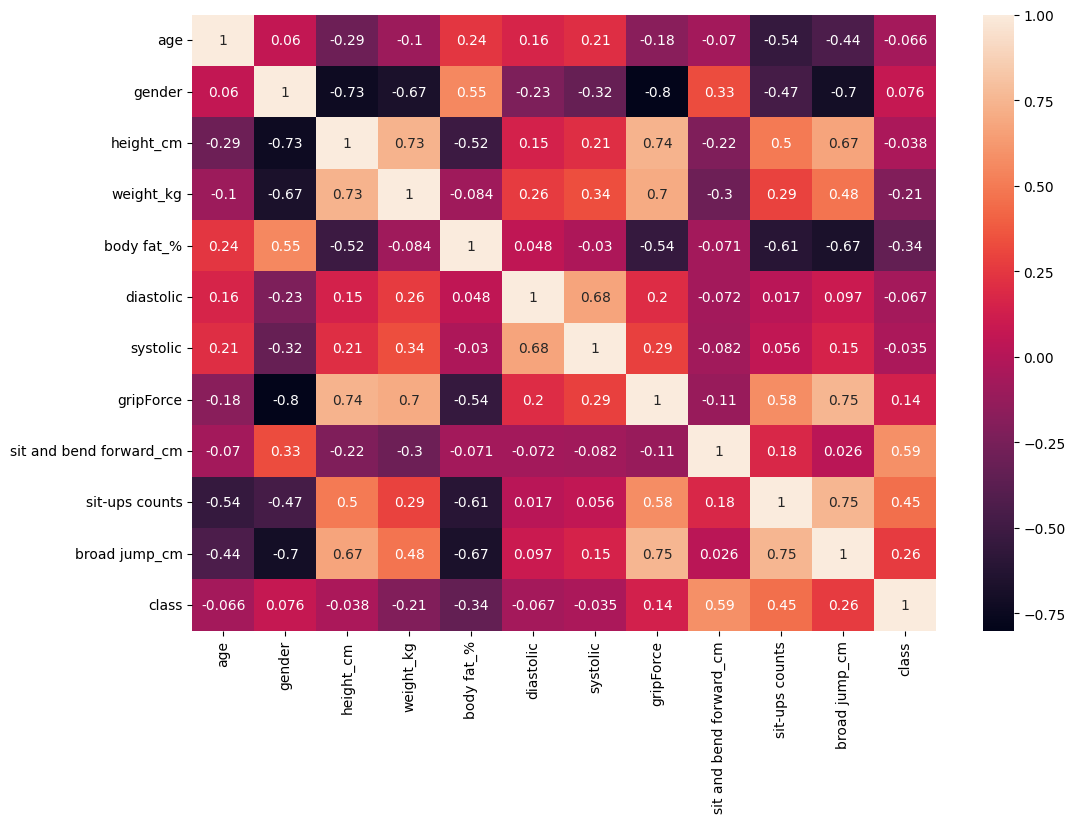

In [140]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

There are no strong linear relationship with *class* variable, which means there is non linear relationship between *class* variable and other variables

Now lets plot boxplot to have understaning of range and distributions for all variables

<Axes: >

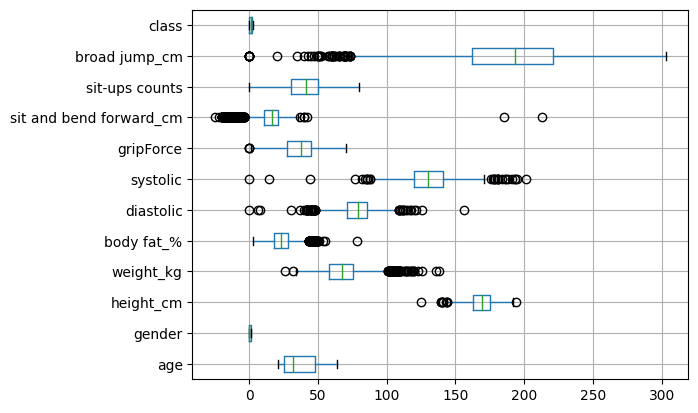

In [141]:
df.boxplot(rot=0, vert=False)

We can see that range and distributions of all the feartures are different. So it will not be feasible to apply NN directly.<br><br>
Let's have independent and dependent variables seperated into X and y variables

In [142]:
#Here class column is dependent variable, which is last column and others are independent columns
X, y = df.iloc[:,:-1], df.iloc[:,-1]
print(X.shape, y.shape)

(13393, 11) (13393,)


Let's now split the data into training and testing

In [143]:
from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

print("Train : ", X_train.shape, y_train.shape)
print("Test : ", X_test.shape, y_test.shape)
print("Validation : ", X_val.shape, y_val.shape)

Train :  (10847, 11) (10847,)
Test :  (1340, 11) (1340,)
Validation :  (1206, 11) (1206,)


Now the data is prepared, let's build a NN using Tensorflow<br><br>

Generally when features are normalized, neural network training is more efficient. So, let's standardized the data

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Now, let's again plot boxplot on training data to see range and distribution of the standardized data

<Axes: >

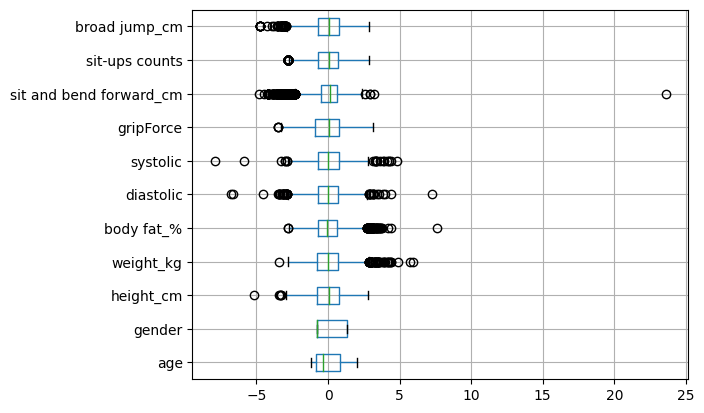

In [145]:
pd.DataFrame(X_train, columns=df.columns[:-1]).boxplot(rot=0, vert=False)

One can see, now are data scaled and all have almost 0 mean

We will use *Sequential* class from `tensorflow.keras.models` and *Dense* layer from `tensorflow.keras.layers` to build our model.
<br>


*   Sequential class will helps us to sequentially position NN layers
*   Dense layer will helps us to define one layer of a FeedForward NN. Dense means each neurons of a layer is connected to all the neurons of the previous layer.



In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Let's create an instance (or object) of sequential class and define a feed forward network with single layer

In [147]:
model =Sequential([
      Dense(64, input_shape=(11,), activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"),
      Dense(4, activation="softmax", kernel_initializer="he_uniform", bias_initializer="zeros")
])

In [148]:
#Print weights
model.weights

[<tf.Variable 'dense_21/kernel:0' shape=(11, 64) dtype=float32, numpy=
 array([[-1.65503398e-02, -1.68381818e-02,  8.36164877e-03,
          4.72965091e-03, -1.92961842e-03, -4.22963761e-02,
         -2.62066964e-02,  2.67968290e-02,  2.09855922e-02,
          2.83783190e-02,  3.76169719e-02,  1.43398307e-02,
         -1.30170807e-02,  1.89312212e-02, -2.27812286e-02,
         -3.02212723e-02, -4.77192886e-02, -1.17172226e-02,
          4.67606448e-02,  4.97646667e-02, -1.35902986e-02,
         -1.68022290e-02, -2.84563657e-02,  3.05902399e-02,
          1.95972808e-02, -4.62108850e-02, -8.85308906e-03,
         -1.51470192e-02,  2.14136951e-02, -2.32881196e-02,
          2.44344138e-02, -4.89383936e-03, -2.58799680e-02,
         -4.58004847e-02, -4.35976163e-02,  2.87462957e-02,
         -1.88263413e-02, -2.79530138e-03, -4.73360196e-02,
         -1.92421079e-02, -2.77310014e-02,  3.39587368e-02,
         -1.35912672e-02, -3.08481809e-02,  1.53038017e-02,
          2.64579058e-03,  2.

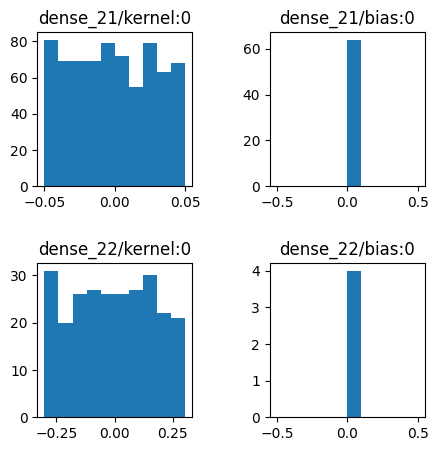

In [149]:
# Plot histograms of weight and bias values
fig, axes = plt.subplots(2,2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#get layers for model layer
weight_layers = [layer for layer in model.layers]

#plot weights
for i, layer in enumerate(weight_layers):
  for j in [0,1]:
    axes[i,j].hist(layer.weights[j].numpy().flatten())
    axes[i,j].set_title(layer.weights[j].name)

From above graph we can see that weights and bias are uniformaly distributed as initialised in the model

In [150]:
#compile model

model = Sequential([
                    Dense(32, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(16, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")])

model.compile(
    optimizer = "adam", # stochastic gradient descent, adam, rmsprop, adadelts
    loss = "sparse_categorical_crossentropy", # sigmoid loss, # mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy
    metrics = ["accuracy"]
)

In [151]:
history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_split = 0.1, verbose=1)

Epoch 1/500
39/39 [==============================] - 1s 7ms/step - loss: 1.3727 - accuracy: 0.3354 - val_loss: 1.3121 - val_accuracy: 0.4313
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 1.2424 - accuracy: 0.4875 - val_loss: 1.1677 - val_accuracy: 0.5088
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 1.0928 - accuracy: 0.5367 - val_loss: 1.0372 - val_accuracy: 0.5419
Epoch 4/500
39/39 [==============================] - 0s 3ms/step - loss: 0.9825 - accuracy: 0.5673 - val_loss: 0.9574 - val_accuracy: 0.5724
Epoch 5/500
39/39 [==============================] - 0s 3ms/step - loss: 0.9196 - accuracy: 0.5947 - val_loss: 0.9121 - val_accuracy: 0.5945
Epoch 6/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8817 - accuracy: 0.6098 - val_loss: 0.8816 - val_accuracy: 0.6147
Epoch 7/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.6209 - val_loss: 0.8664 - val_accuracy: 0.6267
Epoch 8/500
3

Now lets check weights and loss distribution after model training

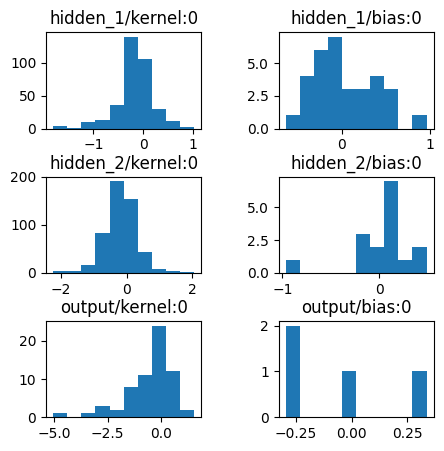

In [155]:
# Plot histograms of weight and bias values
fig, axes = plt.subplots(3,2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#get layers for model layer
weight_layers = [layer for layer in model.layers]

#plot weights
for i, layer in enumerate(weight_layers):
  for j in [0,1]:
    axes[i,j].hist(layer.weights[j].numpy().flatten(), align="left")
    axes[i,j].set_title(layer.weights[j].name)



*   Weights now follow normal distributions

*   Bias are no more zero



In [156]:
#To get model hsitory details
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [157]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [158]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

###Plot Loss vs epochs and accuracy vs epochs

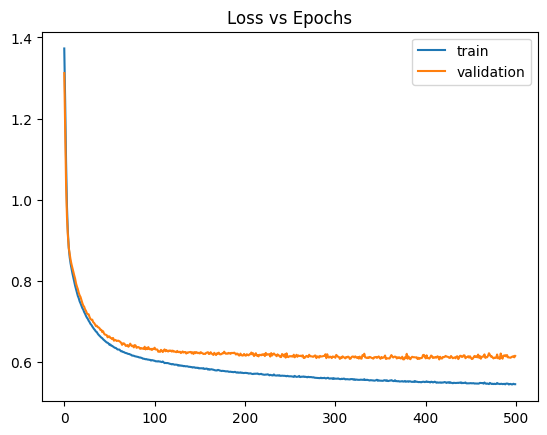

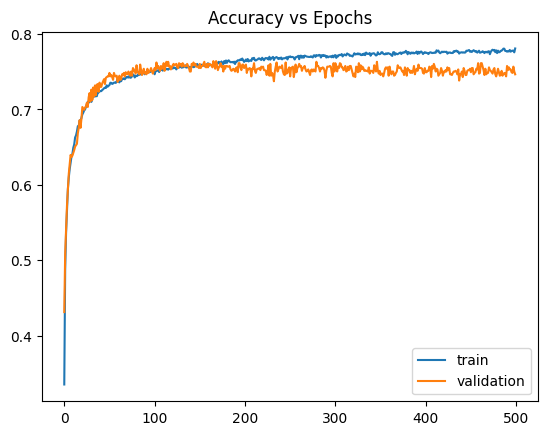

In [159]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")
plt.legend()
plt.title("Loss vs Epochs")

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("Accuracy vs Epochs")
plt.show()

**From the graph we can see that our model is 75% accurate**




###Using ModelCheckpoint from callbacks to save model data
ModelCheckpoint callback is used in training using model.fit()

In [160]:
#checkpoint = tensorflow.keras.callbacks.ModelCheckPoint("My_Model", save_weights_only=True)

In [161]:
#model.fit(X_train, y_train, epochs =100 batch_size=256, validation_split=0.1, verbose=0, callbacks=[checkpoint])

42/42 [==============================] - 0s 1ms/step


<Axes: >

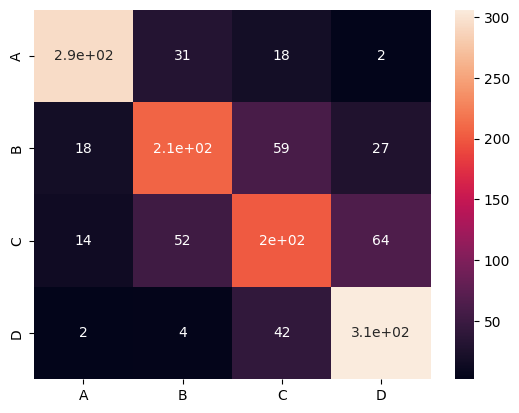

In [162]:
#get raw predictions from model after every epoch
raw_predictions = model.predict(X_test)

#convert raw prediction to class (using np.argmax as we did before)
class_predictions = np.argmax(raw_predictions, axis = 1)

#generate a confusion matrix using predictions and actual labels
cm = sklearn.metrics.confusion_matrix(y_test, class_predictions)

#Plot confusion matrix in heat map
label_list = ['A', 'B', 'C', 'D']
sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list)

### Evaluate the model

`model.evaluate(X_test, y_test)`

- model.evaluate **returns the loss value & metrics value** for the model.
- It is important to note that, **weights/parameters are not updated during evaluation** (and prediction)
- This also means - **only forward pass, no backward pass**

Now lets evalute our models on training, validation and testing datasets

In [163]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

339/339 [==============================] - 1s 3ms/step - loss: 0.5497 - accuracy: 0.7775
Train Set
Loss value :  0.5496924519538879
Accuracy   :  0.7775421738624573


In [164]:
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

38/38 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7595
Validation Set
Loss value :  0.6107128858566284
Accuracy   :  0.7595356702804565


In [165]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

42/42 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.7515
Test Set
Loss value :  0.5970211029052734
Accuracy   :  0.7514925599098206


Predictions
If we need to get the prediction for an unseen data, we can use the predict method to get the predictions. model.predict(X_test)

It returns raw output from the model (i.e. probabilities of an observation belong to each one of the 4 class)

In [168]:
pred = model.predict(X_test)
pred_class = np.argmax(pred, axis = 1)
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, pred_class)

print("Test acc: ", acc_score)

42/42 [==============================] - 0s 4ms/step
Test acc:  0.7514925373134328
